| ![logo](udinus.png)      |**LEMBAR SOAL UJIAN <br> FAKULTAS ILMU KOMPUTER <br> UNIVERSITAS DIAN NUSWANTORO SEMARANG <br>** JL. IMAM BONJOL NO. 207 SEMARANG TELP. 024-3575915, 024-3575916 |
| :---                     |    :----:   | 


|UJIAN TENGAH SEMESTER GASAL 2022/2023|
|:---:|


|Mata Kuliah: Analitika Media Sosial | Sifat: Take Home|
| :---                     |    ----:   |
|Hari / Tanggal: **01 November 2022**       | Waktu: **10.20 - 12.00** |
|Kelompok: A12.6501                 | Dosen: **Abu Salam, M.Kom**|




# Petunjuk Pengerjaan Soal:
- Panduan pengerjaan dalam bentuk gambar ada dibawah block ini
- Sudah disediakan tiap block untuk anda dilengkapi, silakan isi ditempat tersebut, jika block cell kurang, silakan tambahkan lagi **diperbolehkan memodifikasi atau menambahkan proses dari blok yang sudah ada**
- **TUJUAN: ANALISIS TAHAP PRE PROCESSING DAN BERAPA PERFORMA DARI SKEMA YANG DIBUAT DENGAN MENGGUNAKAN TARGET `EMOSI`**

FORMAT PENGIRIMAN SOAL (PILIH SALAH SATU)
- REPOSITORIKAN FILE IPYNB KE GITHUB & KIRIM URL GITHUB KE KULINO BLOK UTS
- FORMAT PENAMAN FILE: AMS_NIM (GANTI TANDA TITIK PADA NIM MENJADI `UNDERSCORE`)


SKEMA KLASIFIKASI
===
![klasifikasi](klasifikasi.png)

SKEMA PRE-PREPROCESSING DATA
===
![preprocessing](preprocessing.png)

# Vincent Tanaka
# A12.2020.06519

# Load Library

Memanggil library yang akan digunakan

In [1]:
import re
import time
import string
from copy import deepcopy
import pandas as pdS

# Load dataset mentah - lihat skema klasifikasi

In [2]:
df = pd.read_csv('Dataset_Sentimen_Emosi.csv')

In [3]:
df

,Tweet,Sentimen,Emosi
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,1
1,aku mohon yaAllah semoga wabah covid-19 menghi...,1.0,-1
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,1
3,Covid belum nyampe prigen mbak hmm hoax,0.0,-2
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-1.0,-2
...,...,...,...
899,Seluruh negara di dunia mengalami masa sulit k...,1.0,-2
900,"Setelah covid dan skripsi disaster selesai, ma...",1.0,2
901,"Malam ini!! Projek ""BENDA BOLEH BINCANG"" 9 mal...",0.0,1
902,Pontang - panting di koyak covid 19,-1.0,-2


# Preprocessing Tahap 00
## Hapus label  `Sentimen` karena yang akan dipakai adalah `Emosi`

In [4]:
df = df.drop(['Sentimen'], axis=1)

## cek info

In [5]:
df.head()

,Tweet,Emosi
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1
1,aku mohon yaAllah semoga wabah covid-19 menghi...,-1
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1
3,Covid belum nyampe prigen mbak hmm hoax,-2
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   904 non-null    object
 1   Emosi   904 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.2+ KB


# Preprocessing Tahap 01

## Proses Penataan Data
bisa menggunakan ekphrasis

In [7]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['email', 'percent', 'money', 'phone', 'user',
        'time', 'date', 'number'],
    # terms that will be annotated
    #annotate={"hashtag", "allcaps", "elongated", "repeated",'emphasis', 'censored'},
    annotate={"hashtag"},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

C:\Users\Vincent\anaconda3\lib\site-packages\ekphrasis\classes\tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...


C:\Users\Vincent\anaconda3\lib\site-packages\ekphrasis\classes\exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


## Pembersihan element yang tidak digunakan

Deklarasikan sesuai kebutuhan

In [8]:
#panggil ekphrasis
def bersih_data(text):
    return " ".join(text_processor.pre_process_doc(text))

In [9]:
def non_ascii(text):
    return text.encode('ascii', 'replace').decode('ascii')

def remove_space_alzami(text):
    return " ".join(text.split())

def remove_emoji_alzami(text):
    return ' '.join(re.sub("([x#][A-Za-z0-9]+)"," ", text).split())

def remove_tab(text):
    return text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")

def remove_tab2(text):
    return re.sub('\s+',' ',text)

def remove_rt(text):
    return text.replace('RT'," ")

def remove_mention(text):
    return ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())

def remove_incomplete_url(text):
    return text.replace("http://", " ").replace("https://", " ")

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def remove_excessive_dot(text):
    return text.replace('..'," ")

def change_stripe(text):
    return text.replace('-'," ")

def lower(text):
    return text.lower()

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def remove_excessive_dot(text):
    return text.replace('..'," ")

def lower(text):
    return text.lower()

def remove_whitespace_LT(text):
    return text.strip()

def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

def remove_punctuation(text):
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    return re.sub(pattern, "", text) 

In [10]:
# hapus untuk <>
def remove_number_eks(text):
    return text.replace('<number>'," ")

def remove_angka(text):
    return re.sub(r"\d+", "", text) 

def remove_URL_eks(text):
    return text.replace('URL'," ").replace('url'," ")

def space_punctuation(text):
    return re.sub('(?<! )(?=[.,!?()])|(?<=[.,!?()])(?! )', r' ', text)

**Panggil dan jalankan fungsi yang di deskripsikan diatas**

In [11]:
i = 0
final_string = []
s = ""
for text in df['Tweet'].values:
    filteredSentence = []
    EachReviewText = ""
    proc = remove_rt(text)
    proc = lower(proc)
    proc = change_stripe(proc)
    proc = remove_tab(proc)
    proc = remove_mention(proc)
    proc = remove_tab2(proc)
    proc = non_ascii(proc)
    proc = remove_incomplete_url(proc)
    proc = remove_excessive_dot(proc)
    proc = remove_whitespace_LT(proc)
    proc = remove_whitespace_multiple(proc)
    proc = remove_single_char(proc)
    proc = space_punctuation(proc)
    proc = remove_punctuation(proc)
    proc = remove_space_alzami(proc)
    proc = bersih_data(proc)
    proc = remove_number_eks(proc)
    proc = remove_angka(proc) 
    proc = remove_URL_eks(proc)
    EachReviewText = proc
    final_string.append(EachReviewText)

In [12]:
df["step01"] = final_string

#### Sampai tahap ini didaparkan kolom baru untuk Kolom `step01`

In [13]:
### Tampilkan posisi data terakhir (10 Teratas)
df.head(10)

,Tweet,Emosi,step01
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1,cegah mata rantai covid mari kita dirumah sa...
1,aku mohon yaAllah semoga wabah covid-19 menghi...,-1,aku mohon yaallah semoga wabah covid menghil...
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1,pemprov papua naikkan status jadi tanggap daru...
3,Covid belum nyampe prigen mbak hmm hoax,-2,covid belum nyampe prigen mbak hmm hoax
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2,nyuruh orang pintar lu aja togog itu kerumunan...
5,Pikir2 balik byk mnde plk nk setelkn lepas covid.,1,pikir balik byk mnde plk nk setelkn lepas covid
6,"Selamat pagi, hari jum'at. Jum'at keempat di k...",-1,selamat pagi hari jumat jumat keempat di kala ...
7,"Hikmah di balik musibah covid-19, smg para pej...",-2,hikmah di balik musibah covid smg para pejab...
8,Cegah covid-19 beserta jajaran Polsek Kuranji ...,1,cegah covid beserta jajaran polsek kuranji m...
9,Ya Allah kami memohon pada mu perkenankanlah d...,-1,ya allah kami memohon pada mu perkenankanlah d...


## Hapus data kosong

In [14]:
df_hapus = df[~df['step01'].str.contains(" ")]

In [15]:
df_hapus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 78 to 78
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   1 non-null      object
 1   Emosi   1 non-null      int64 
 2   step01  1 non-null      object
dtypes: int64(1), object(2)
memory usage: 32.0+ bytes


In [16]:
df_hapus.head(10)

,Tweet,Emosi,step01
78,covid,1,covid


In [17]:
df_new = df[~df.isin(df_hapus)].dropna()

In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903 entries, 0 to 903
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tweet   903 non-null    object 
 1   Emosi   903 non-null    float64
 2   step01  903 non-null    object 
dtypes: float64(1), object(2)
memory usage: 28.2+ KB


In [19]:
df_new

,Tweet,Emosi,step01
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid mari kita dirumah sa...
1,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid menghil...
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...
3,Covid belum nyampe prigen mbak hmm hoax,-2.0,covid belum nyampe prigen mbak hmm hoax
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2.0,nyuruh orang pintar lu aja togog itu kerumunan...
...,...,...,...
899,Seluruh negara di dunia mengalami masa sulit k...,-2.0,seluruh negara di dunia mengalami masa sulit k...
900,"Setelah covid dan skripsi disaster selesai, ma...",2.0,setelah covid dan skripsi disaster selesai mau...
901,"Malam ini!! Projek ""BENDA BOLEH BINCANG"" 9 mal...",1.0,malam ini projek benda boleh bincang malam d...
902,Pontang - panting di koyak covid 19,-2.0,pontang panting di koyak covid


## Pembersihan data dengan konsep rubah kata `SLANG` menjadi kata `BAKU`

In [20]:
## Bisa menggunakan nltk 
import nltk
from nltk.tokenize import word_tokenize 

In [21]:
def word_tokenize_wrapper(text):
  return word_tokenize(text)

In [22]:
df_new['tokens'] = df['step01'].apply(word_tokenize_wrapper)

#### Sampai tahap ini didaparkan kolom baru untuk Kolom `tokens`

In [23]:
df_new.head(10)

,Tweet,Emosi,step01,tokens
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid mari kita dirumah sa...,"[cegah, mata, rantai, covid, mari, kita, dirum..."
1,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid menghil...,"[aku, mohon, yaallah, semoga, wabah, covid, me..."
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"[pemprov, papua, naikkan, status, jadi, tangga..."
3,Covid belum nyampe prigen mbak hmm hoax,-2.0,covid belum nyampe prigen mbak hmm hoax,"[covid, belum, nyampe, prigen, mbak, hmm, hoax]"
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2.0,nyuruh orang pintar lu aja togog itu kerumunan...,"[nyuruh, orang, pintar, lu, aja, togog, itu, k..."
5,Pikir2 balik byk mnde plk nk setelkn lepas covid.,1.0,pikir balik byk mnde plk nk setelkn lepas covid,"[pikir, balik, byk, mnde, plk, nk, setelkn, le..."
6,"Selamat pagi, hari jum'at. Jum'at keempat di k...",-1.0,selamat pagi hari jumat jumat keempat di kala ...,"[selamat, pagi, hari, jumat, jumat, keempat, d..."
7,"Hikmah di balik musibah covid-19, smg para pej...",-2.0,hikmah di balik musibah covid smg para pejab...,"[hikmah, di, balik, musibah, covid, smg, para,..."
8,Cegah covid-19 beserta jajaran Polsek Kuranji ...,1.0,cegah covid beserta jajaran polsek kuranji m...,"[cegah, covid, beserta, jajaran, polsek, kuran..."
9,Ya Allah kami memohon pada mu perkenankanlah d...,-1.0,ya allah kami memohon pada mu perkenankanlah d...,"[ya, allah, kami, memohon, pada, mu, perkenank..."


In [24]:
normalized_word = pd.read_csv('Kamus_Perbaikan_Kata.csv', sep=';')

In [25]:
normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

In [26]:
df_new['final_tokens'] = df_new['tokens'].apply(normalized_term)

In [27]:
i=0
final_string_tokens = []
for text in df_new['final_tokens'].values:
    EachReviewText = ""
    EachReviewText = ' '.join(text)
    final_string_tokens.append(EachReviewText)

In [28]:
df_new["step02"] = final_string_tokens

In [29]:
#### Sampai tahap ini didaparkan kolom baru untuk Kolom `final_token` `dan step02`

In [30]:
df_new.head(10)

,Tweet,Emosi,step01,tokens,final_tokens,step02
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid mari kita dirumah sa...,"[cegah, mata, rantai, covid, mari, kita, dirum...","[cegah, mata, rantai, covid, mari, kita, dirum...",cegah mata rantai covid mari kita dirumah saja...
1,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid menghil...,"[aku, mohon, yaallah, semoga, wabah, covid, me...","[aku, mohon, yaallah, semoga, wabah, covid, me...",aku mohon yaallah semoga wabah covid menghilan...
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"[pemprov, papua, naikkan, status, jadi, tangga...","[pemprov, papua, naikkan, status, jadi, tangga...",pemprov papua naikkan status jadi tanggap daru...
3,Covid belum nyampe prigen mbak hmm hoax,-2.0,covid belum nyampe prigen mbak hmm hoax,"[covid, belum, nyampe, prigen, mbak, hmm, hoax]","[covid, belum, sampai, prigen, mbak, aduh, boh...",covid belum sampai prigen mbak aduh bohong
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2.0,nyuruh orang pintar lu aja togog itu kerumunan...,"[nyuruh, orang, pintar, lu, aja, togog, itu, k...","[nyuruh, orang, pintar, kamu, saja, togog, itu...",nyuruh orang pintar kamu saja togog itu kerumu...
5,Pikir2 balik byk mnde plk nk setelkn lepas covid.,1.0,pikir balik byk mnde plk nk setelkn lepas covid,"[pikir, balik, byk, mnde, plk, nk, setelkn, le...","[pikir, balik, banyak, mnde, plk, nk, setelkn,...",pikir balik banyak mnde plk nk setelkn lepas c...
6,"Selamat pagi, hari jum'at. Jum'at keempat di k...",-1.0,selamat pagi hari jumat jumat keempat di kala ...,"[selamat, pagi, hari, jumat, jumat, keempat, d...","[selamat, pagi, hari, jumat, jumat, keempat, d...",selamat pagi hari jumat jumat keempat di kala ...
7,"Hikmah di balik musibah covid-19, smg para pej...",-2.0,hikmah di balik musibah covid smg para pejab...,"[hikmah, di, balik, musibah, covid, smg, para,...","[hikmah, di, balik, musibah, covid, semoga, pa...",hikmah di balik musibah covid semoga para peja...
8,Cegah covid-19 beserta jajaran Polsek Kuranji ...,1.0,cegah covid beserta jajaran polsek kuranji m...,"[cegah, covid, beserta, jajaran, polsek, kuran...","[cegah, covid, beserta, jajaran, polsek, kuran...",cegah covid beserta jajaran polsek kuranji mel...
9,Ya Allah kami memohon pada mu perkenankanlah d...,-1.0,ya allah kami memohon pada mu perkenankanlah d...,"[ya, allah, kami, memohon, pada, mu, perkenank...","[iya, allah, kami, memohon, pada, mu, perkenan...",iya allah kami memohon pada mu perkenankanlah ...


## simpan file terlebih dahulu
gunakan fitur ini, kenapa? untuk mengecek apakah preprocessing kita sudah sesuai logika atau tidak
- Contoh : pastikan kata `beserta` tetap menjadi `beserta`, bukan `bese a`

**setelah anda melihat bahwa dataset sudah tepat, kita lanjut ke tahap berikutnya**

In [31]:
df_new.to_csv('clean_dataset_uts_part01.csv',sep=";")

# Stemming menggunakan Sastrawi

## load sastrawi

In [32]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

## stopwords

In [33]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
 
factory = StopWordRemoverFactory()

more_stopword = ['sih','kak','kah', 'cem', 'kek', 'yah', 'nya', 'rt','loh','lah', 'dd', 'mah', 'nye', 'eh', 'ehh', 'ah', 'yang','yg']
 
# Tambahkan Stopword Baru
data = factory.get_stop_words()+more_stopword

stopwords_sastrawi = factory.create_stop_word_remover()

dictionary = ArrayDictionary(data)
str_stopwords = StopWordRemover(dictionary)

In [34]:
df_new['step02'] = df_new['step02'].apply(str)

In [35]:
df_new.head()

,Tweet,Emosi,step01,tokens,final_tokens,step02
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid mari kita dirumah sa...,"[cegah, mata, rantai, covid, mari, kita, dirum...","[cegah, mata, rantai, covid, mari, kita, dirum...",cegah mata rantai covid mari kita dirumah saja...
1,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid menghil...,"[aku, mohon, yaallah, semoga, wabah, covid, me...","[aku, mohon, yaallah, semoga, wabah, covid, me...",aku mohon yaallah semoga wabah covid menghilan...
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"[pemprov, papua, naikkan, status, jadi, tangga...","[pemprov, papua, naikkan, status, jadi, tangga...",pemprov papua naikkan status jadi tanggap daru...
3,Covid belum nyampe prigen mbak hmm hoax,-2.0,covid belum nyampe prigen mbak hmm hoax,"[covid, belum, nyampe, prigen, mbak, hmm, hoax]","[covid, belum, sampai, prigen, mbak, aduh, boh...",covid belum sampai prigen mbak aduh bohong
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2.0,nyuruh orang pintar lu aja togog itu kerumunan...,"[nyuruh, orang, pintar, lu, aja, togog, itu, k...","[nyuruh, orang, pintar, kamu, saja, togog, itu...",nyuruh orang pintar kamu saja togog itu kerumu...


In [36]:
i=0
final_string = []
s = ""
for sentence in df_new["step02"].values:
    filteredSentence = []
    EachReviewText = ""
    st = stopwords_sastrawi.remove(sentence)
    s = (stemmer.stem(st))
    filteredSentence.append(s)
    
    EachReviewText = ' '.join(filteredSentence)
    final_string.append(EachReviewText)

In [37]:
df_new.loc[:, ('ProcessedText')] = final_string

In [38]:
df_new.head()

,Tweet,Emosi,step01,tokens,final_tokens,step02,ProcessedText
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid mari kita dirumah sa...,"[cegah, mata, rantai, covid, mari, kita, dirum...","[cegah, mata, rantai, covid, mari, kita, dirum...",cegah mata rantai covid mari kita dirumah saja...,cegah mata rantai covid kita rumah hingga hari...
1,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid menghil...,"[aku, mohon, yaallah, semoga, wabah, covid, me...","[aku, mohon, yaallah, semoga, wabah, covid, me...",aku mohon yaallah semoga wabah covid menghilan...,aku mohon yaallah moga wabah covid hilang rama...
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"[pemprov, papua, naikkan, status, jadi, tangga...","[pemprov, papua, naikkan, status, jadi, tangga...",pemprov papua naikkan status jadi tanggap daru...,pemprov papua naik status jadi tanggap darurat...
3,Covid belum nyampe prigen mbak hmm hoax,-2.0,covid belum nyampe prigen mbak hmm hoax,"[covid, belum, nyampe, prigen, mbak, hmm, hoax]","[covid, belum, sampai, prigen, mbak, aduh, boh...",covid belum sampai prigen mbak aduh bohong,covid sampai prigen mbak aduh bohong
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2.0,nyuruh orang pintar lu aja togog itu kerumunan...,"[nyuruh, orang, pintar, lu, aja, togog, itu, k...","[nyuruh, orang, pintar, kamu, saja, togog, itu...",nyuruh orang pintar kamu saja togog itu kerumu...,nyuruh orang pintar kamu togog kerumun orang n...


## simpan kembali untuk jaga-jaga
- cek apakah stop words ada yang perlu dirubah atau tidak

In [39]:
df_new.to_csv('clean_dataset_uts_part02.csv',sep=";")

# penutup bagian preprocessing data

disini data sudah bersih, kita akan masuk ke tahap machine learning

# Mulai Modelling

## bagi menjadi feature dan label

In [40]:
dataset_feature = df_new['ProcessedText'].astype(str)

In [41]:
dataset_label = df_new['Emosi']

In [42]:
dataset_feature

0      cegah mata rantai covid kita rumah hingga hari...
1      aku mohon yaallah moga wabah covid hilang rama...
2      pemprov papua naik status jadi tanggap darurat...
3                   covid sampai prigen mbak aduh bohong
4      nyuruh orang pintar kamu togog kerumun orang n...
                             ...                        
899    seluruh negara dunia alami masa sulit covid ra...
900    covid skripsi disaster selesai mau banget ajar...
901    malam proyek benda bincang malam fb satu belia...
902                          pontang panting koyak covid
903    masalah sekarang isu jangkit covid alaaaa bosa...
Name: ProcessedText, Length: 903, dtype: object

## Cek Distribusi Data

In [43]:
dataset_label

0      1.0
1     -1.0
2      1.0
3     -2.0
4     -2.0
      ... 
899   -2.0
900    2.0
901    1.0
902   -2.0
903   -2.0
Name: Emosi, Length: 903, dtype: float64

In [44]:
dataset_label.value_counts()

 1.0    300
-1.0    245
-2.0    201
 2.0    157
Name: Emosi, dtype: int64

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 1200x800 with 0 Axes>

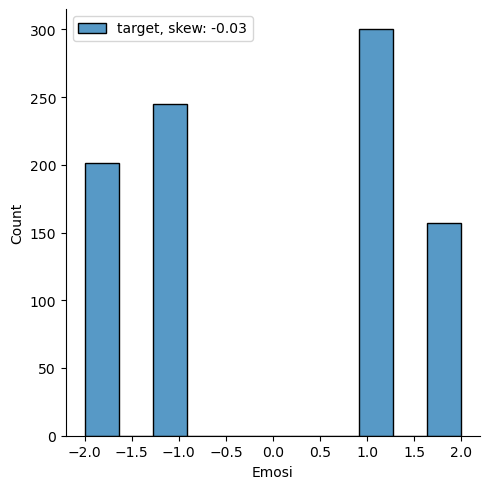

In [46]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.displot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

# **Kesimpulan dataset: ??? **

 Dari dataset label, ditemukan bahwa persentase dan jumlah Emosi pada dataset sebanyak :
 1.0    33.2% 300  
-1.0    27.1% 245
-2.0    22.3% 201
 2.0    17.4% 157

## Fitur Ekstraksi Menggunakan TF-IDF

### Cek Emosi 

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
vectorizer = TfidfVectorizer()

In [49]:
positive_low_reviews = df_new[(df_new["Emosi"] == 1)]
negative_low_reviews = df_new[(df_new["Emosi"] == -1)]
positive_high_reviews = df_new[(df_new["Emosi"] == 2)]
negative_high_reviews = df_new[(df_new["Emosi"] == -2)]

### cek emosi positive low

In [50]:
positive_low_reviews.head()

,Tweet,Emosi,step01,tokens,final_tokens,step02,ProcessedText
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid mari kita dirumah sa...,"[cegah, mata, rantai, covid, mari, kita, dirum...","[cegah, mata, rantai, covid, mari, kita, dirum...",cegah mata rantai covid mari kita dirumah saja...,cegah mata rantai covid kita rumah hingga hari...
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"[pemprov, papua, naikkan, status, jadi, tangga...","[pemprov, papua, naikkan, status, jadi, tangga...",pemprov papua naikkan status jadi tanggap daru...,pemprov papua naik status jadi tanggap darurat...
5,Pikir2 balik byk mnde plk nk setelkn lepas covid.,1.0,pikir balik byk mnde plk nk setelkn lepas covid,"[pikir, balik, byk, mnde, plk, nk, setelkn, le...","[pikir, balik, banyak, mnde, plk, nk, setelkn,...",pikir balik banyak mnde plk nk setelkn lepas c...,pikir balik banyak mnde plk nk setelkn lepas c...
8,Cegah covid-19 beserta jajaran Polsek Kuranji ...,1.0,cegah covid beserta jajaran polsek kuranji m...,"[cegah, covid, beserta, jajaran, polsek, kuran...","[cegah, covid, beserta, jajaran, polsek, kuran...",cegah covid beserta jajaran polsek kuranji mel...,cegah covid serta jajar polsek ranji laku aksi...
15,"Ada 15 cara menyuruh Covid-19 segera pergi, Ja...",1.0,ada cara menyuruh covid segera pergi jaga ...,"[ada, cara, menyuruh, covid, segera, pergi, ja...","[ada, cara, menyuruh, covid, segera, pergi, ja...",ada cara menyuruh covid segera pergi jaga kebe...,cara suruh covid segera pergi jaga bersih tert...


In [51]:
Positive_1_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
Positive_1_tf_idf = Positive_1_tf_idf_vect.fit_transform(positive_low_reviews["ProcessedText"].values)

In [52]:
Positive_1_tf_idf.shape

(300, 5137)

In [53]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [54]:
from wordcloud import WordCloud

In [55]:
features = Positive_1_tf_idf_vect.get_feature_names()

idfValues = Positive_1_tf_idf_vect.idf_

d = dict(zip(features, 9 - idfValues))

sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

for i in range(200):
    print(sortedDict[i])

('covid', 7.976469502589806)
('sebar', 6.184710033361751)
('cegah', 6.164090746159015)
('virus', 6.099552225021444)
('rumah', 5.69408711691328)
('sama', 5.69408711691328)
('corona', 5.511765560119326)
('laku', 5.47094356559907)
('sebar covid', 5.428383951180274)
('jaga', 5.383932188609441)
('orang', 5.337412172974547)
('perintah', 5.337412172974547)
('virus covid', 5.288622008805115)
('masyarakat', 5.237328714417565)
('sebar virus', 5.237328714417565)
('sehat', 5.237328714417565)
('virus corona', 5.237328714417565)
('ada', 5.183261493147289)
('iya', 5.183261493147289)
('tangan', 5.183261493147289)
('tetap', 5.183261493147289)
('cegah covid', 5.12610307930734)
('cegah sebar', 5.12610307930734)
('corona covid', 5.12610307930734)
('date', 5.12610307930734)
('jadi', 5.12610307930734)
('warga', 5.12610307930734)
('indonesia', 5.065478457490905)
('pasien', 5.065478457490905)
('baru', 5.000939936353334)
('dampak', 4.9319470648663835)
('di', 4.9319470648663835)
('jangan', 4.9319470648663835)
(

C:\Users\Vincent\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [56]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plt.figure(figsize=(15,10))
    plt.imshow(worcloudPlot, interpolation="bilinear")
    plt.axis("off")
    plt.show()

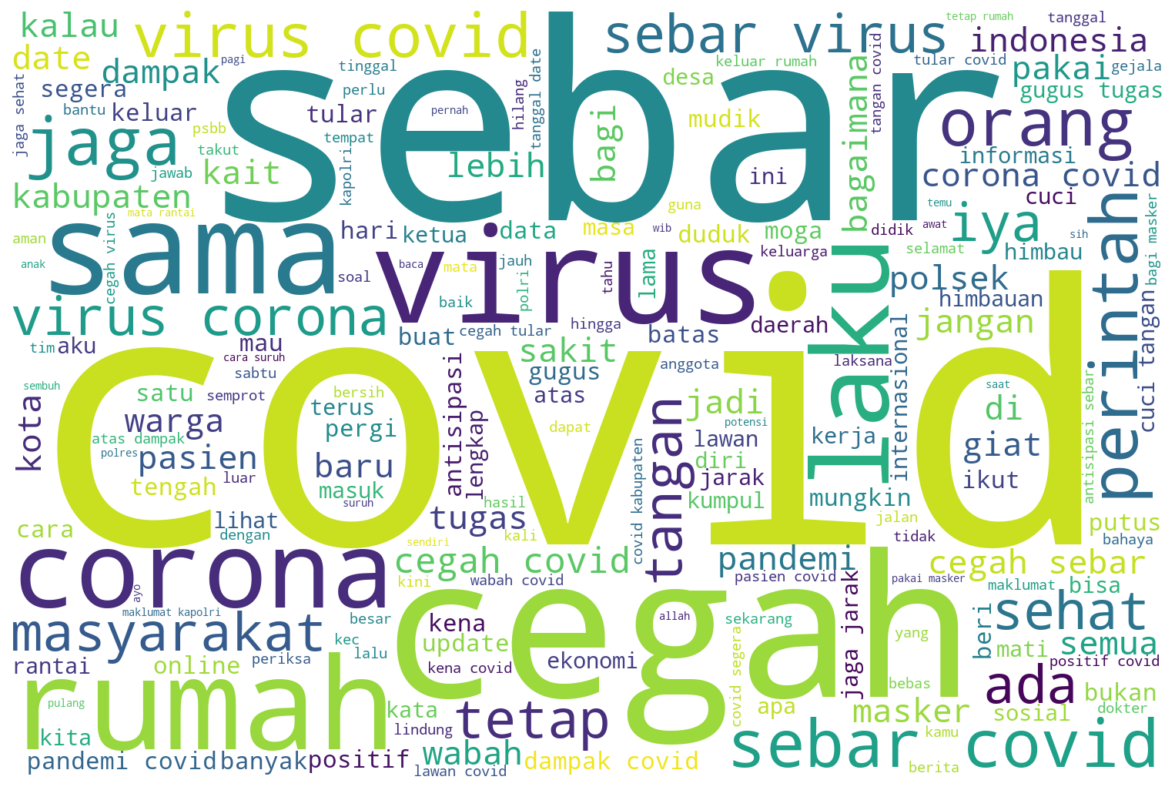

In [57]:
PlotWordCloud(d)

### cek emosi positive high

In [58]:
positive_high_reviews.head()

,Tweet,Emosi,step01,tokens,final_tokens,step02,ProcessedText
10,"Sah.. Cegah Covid-19 Meluas, Pemerintah Revisi...",2.0,sah cegah covid meluas pemerintah revisi har...,"[sah, cegah, covid, meluas, pemerintah, revisi...","[sah, cegah, covid, meluas, pemerintah, revisi...",sah cegah covid meluas pemerintah revisi hari ...,sah cegah covid luas perintah revisi hari libu...
11,Bencana Nasional Covid-19; DPRD Indramayu Mint...,2.0,bencana nasional covid dprd indramayu minta ...,"[bencana, nasional, covid, dprd, indramayu, mi...","[bencana, nasional, covid, dprd, indramayu, mi...",bencana nasional covid dprd indramayu minta bu...,bencana nasional covid dprd indramayu minta bu...
14,Skrinews - Pdt. JIMMY: MARI BERSAMA MEMERANGI ...,2.0,skrinews pdt jimmy mari bersama memerangi viru...,"[skrinews, pdt, jimmy, mari, bersama, memerang...","[skrinews, pdt, jimmy, mari, bersama, memerang...",skrinews pdt jimmy mari bersama memerangi viru...,skrinews pdt jimmy sama rang virus corona covi...
21,"Temanggung, Jawa Tengah...anggota gugus tugas ...",2.0,temanggung jawa tengah anggota gugus tugas cov...,"[temanggung, jawa, tengah, anggota, gugus, tug...","[temanggung, jawa, tengah, anggota, gugus, tug...",temanggung jawa tengah anggota gugus tugas cov...,tanggung jawa tengah anggota gugus tugas covid...
33,Amalkan langkah-langkah pencegahan penularan C...,2.0,amalkan langkah langkah pencegahan penularan c...,"[amalkan, langkah, langkah, pencegahan, penula...","[amalkan, langkah, langkah, pencegahan, penula...",amalkan langkah langkah pencegahan penularan c...,amal langkah langkah cegah tular covid amal hi...


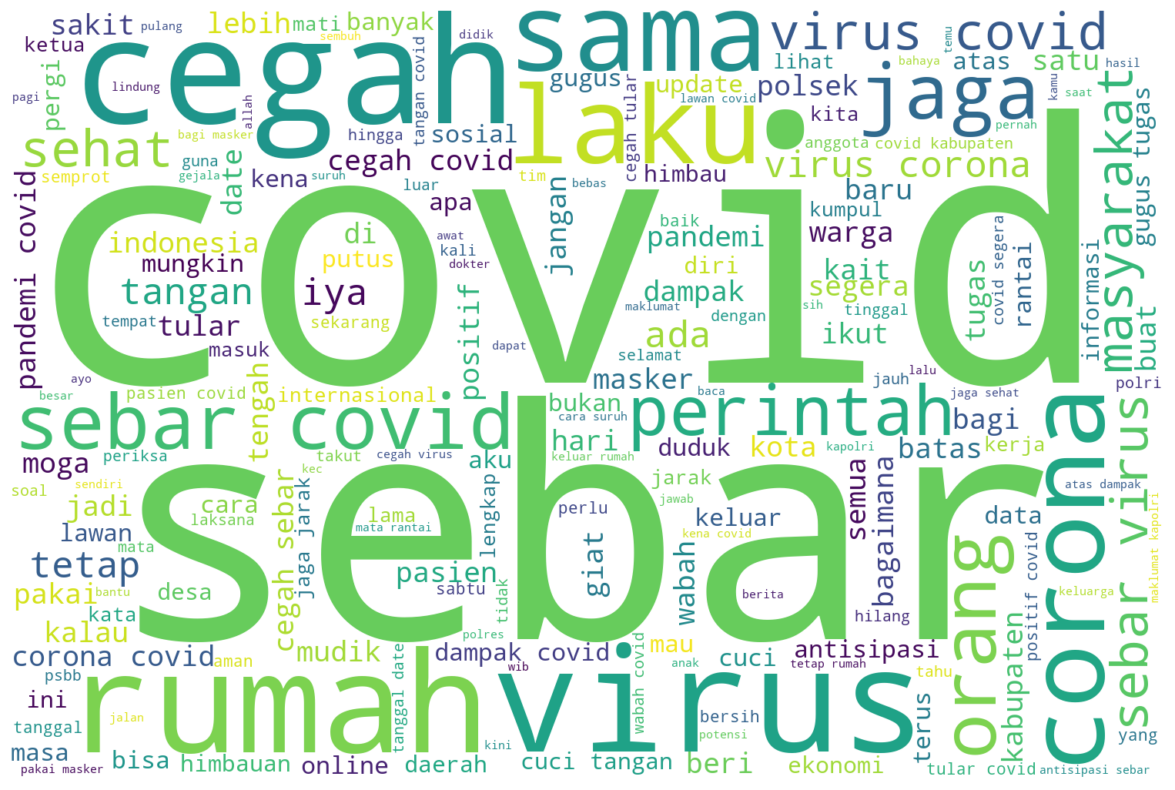

In [59]:
PlotWordCloud(d)

### cek emosi negative low

In [60]:
negative_low_reviews.head()

,Tweet,Emosi,step01,tokens,final_tokens,step02,ProcessedText
1,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid menghil...,"[aku, mohon, yaallah, semoga, wabah, covid, me...","[aku, mohon, yaallah, semoga, wabah, covid, me...",aku mohon yaallah semoga wabah covid menghilan...,aku mohon yaallah moga wabah covid hilang rama...
6,"Selamat pagi, hari jum'at. Jum'at keempat di k...",-1.0,selamat pagi hari jumat jumat keempat di kala ...,"[selamat, pagi, hari, jumat, jumat, keempat, d...","[selamat, pagi, hari, jumat, jumat, keempat, d...",selamat pagi hari jumat jumat keempat di kala ...,selamat pagi hari jumat jumat empat kala pande...
9,Ya Allah kami memohon pada mu perkenankanlah d...,-1.0,ya allah kami memohon pada mu perkenankanlah d...,"[ya, allah, kami, memohon, pada, mu, perkenank...","[iya, allah, kami, memohon, pada, mu, perkenan...",iya allah kami memohon pada mu perkenankanlah ...,iya allah mohon mu kenan doa doa rana sungguh ...
12,"Cegah Covid-19, Pemprov dan FKUB Papua Barat S...",-1.0,cegah covid pemprov dan fkub papua barat sep...,"[cegah, covid, pemprov, dan, fkub, papua, bara...","[cegah, covid, pemprov, dan, fkub, papua, bara...",cegah covid pemprov dan fkub papua barat sepak...,cegah covid pemprov fkub papua barat sepakat a...
23,Btw long weekend ni pada mau kemana... Dulu se...,-1.0,btw long weekend ni pada mau kemana dulu sebel...,"[btw, long, weekend, ni, pada, mau, kemana, du...","[eh, long, weekend, ini, pada, mau, kemana, du...",eh long weekend ini pada mau kemana dulu sebel...,eh long weekend pada mau dulu ada nya sih covi...


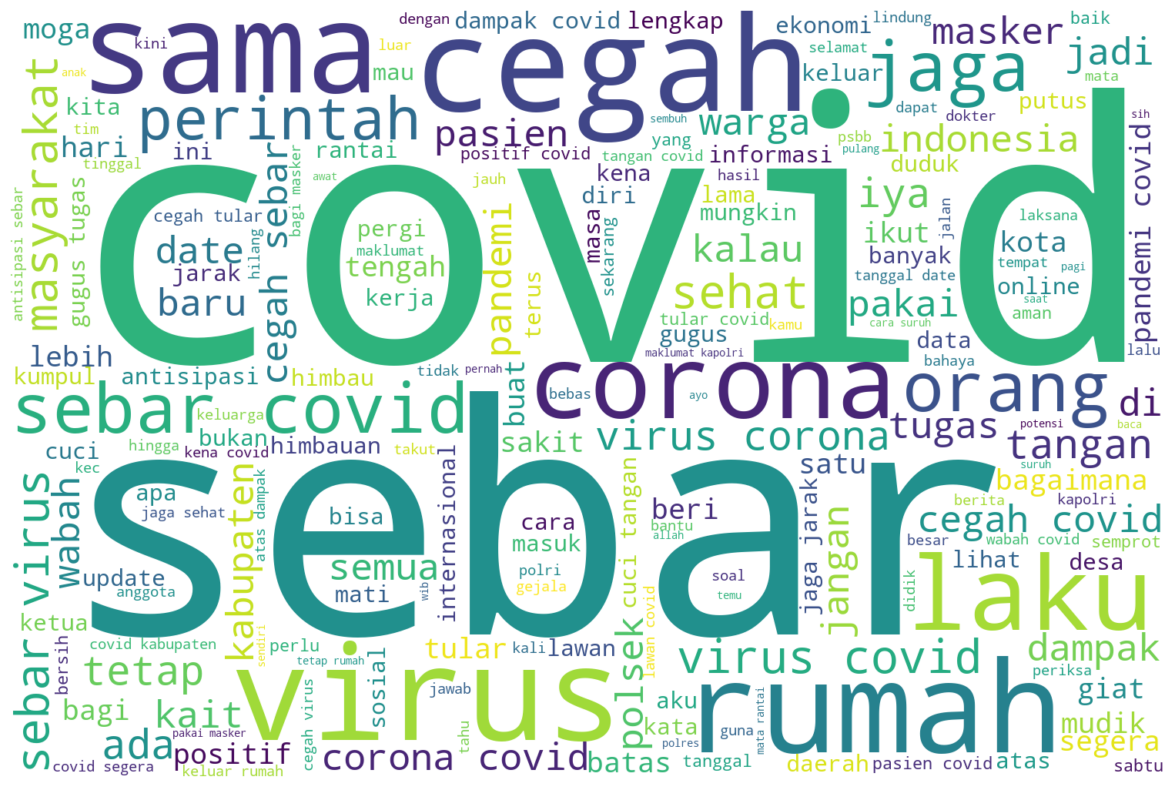

In [61]:
PlotWordCloud(d)

### cek emosi negative high

In [62]:
negative_high_reviews.head()

,Tweet,Emosi,step01,tokens,final_tokens,step02,ProcessedText
3,Covid belum nyampe prigen mbak hmm hoax,-2.0,covid belum nyampe prigen mbak hmm hoax,"[covid, belum, nyampe, prigen, mbak, hmm, hoax]","[covid, belum, sampai, prigen, mbak, aduh, boh...",covid belum sampai prigen mbak aduh bohong,covid sampai prigen mbak aduh bohong
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2.0,nyuruh orang pintar lu aja togog itu kerumunan...,"[nyuruh, orang, pintar, lu, aja, togog, itu, k...","[nyuruh, orang, pintar, kamu, saja, togog, itu...",nyuruh orang pintar kamu saja togog itu kerumu...,nyuruh orang pintar kamu togog kerumun orang n...
7,"Hikmah di balik musibah covid-19, smg para pej...",-2.0,hikmah di balik musibah covid smg para pejab...,"[hikmah, di, balik, musibah, covid, smg, para,...","[hikmah, di, balik, musibah, covid, semoga, pa...",hikmah di balik musibah covid semoga para peja...,hikmah balik musibah covid moga jabat perintah...
13,pagi... kenapa ya di daerah sy (cipinang besar...,-2.0,pagi kenapa ya di daerah sy cipinang besar sel...,"[pagi, kenapa, ya, di, daerah, sy, cipinang, b...","[pagi, kenapa, iya, di, daerah, saya, cipinang...",pagi kenapa iya di daerah saya cipinang besar ...,pagi iya daerah cipinang besar selatan rt rw n...
17,"Aku baru bangun tidur, dan menyeruput kopi sed...",-2.0,aku baru bangun tidur dan menyeruput kopi sedi...,"[aku, baru, bangun, tidur, dan, menyeruput, ko...","[aku, baru, bangun, tidur, dan, menyeruput, ko...",aku baru bangun tidur dan menyeruput kopi sedi...,aku baru bangun tidur seruput kopi sedikit ibu...


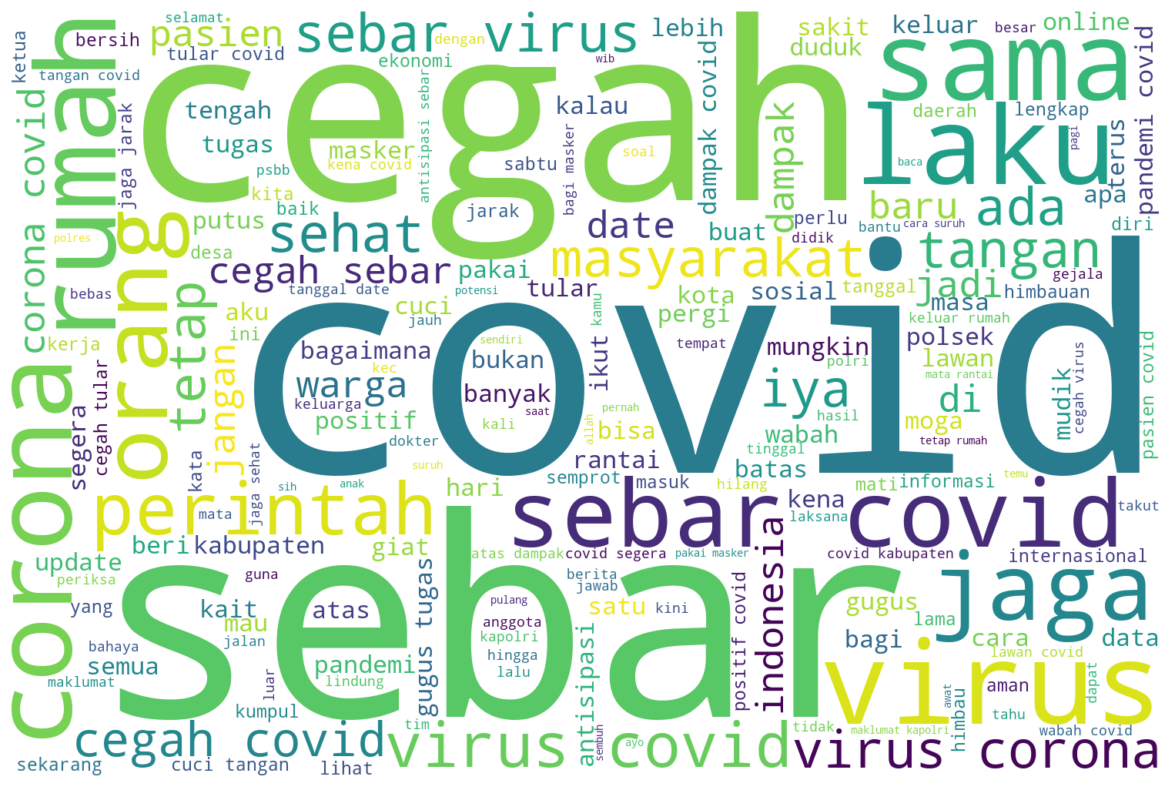

In [63]:
PlotWordCloud(d)

## Cek emosi untuk Semua label

**jangan lupa, gunakan semua data, maka yang dilakukan adalah mengolah data `df_new["Emosi"]`**

In [64]:
tfidf_vect = TfidfVectorizer(ngram_range = (1,2))

In [65]:
Data_TFIDF = tfidf_vect.fit_transform(df_new["ProcessedText"].values)

In [66]:
Data_TFIDF.shape

(903, 13977)

## Training dan Testing dibagi menjadi 70 - 30

In [67]:
### Lengkapi kodenya
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [68]:
train_TFIDF, test_TFIDF, train_labels_TFIDF, test_labels_TFIDF = train_test_split(dataset_feature, dataset_label, test_size = 0.3, random_state=42)

In [69]:
train_TFIDF.shape, test_TFIDF.shape, train_labels_TFIDF.shape, test_labels_TFIDF.shape

((632,), (271,), (632,), (271,))

## Model - Naive Bayes

In [70]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


In [71]:
classifier_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

In [72]:
parameters_nb = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
    'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100)
}

In [73]:
classifier_nb = GridSearchCV(classifier_nb, parameters_nb, cv = 3, n_jobs=-1)

In [74]:
classifier_nb.fit(train_TFIDF, train_labels_TFIDF.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100),
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3),
                                                (1, 4)]})

In [75]:
## Berapa nilai Accuracy Training set dan Test Set ?
y_pred_nb_train = classifier_nb.predict(train_TFIDF)
accuracy_nb_train = accuracy_score(train_labels_TFIDF, y_pred_nb_train)
print("Accuracy Training Set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(test_TFIDF)
accuracy_nb_test = accuracy_score(test_labels_TFIDF, y_pred_nb_test)
print("Accuracy Testing Set: ", accuracy_nb_test)

Accuracy Training Set:  0.9778481012658228
Accuracy Testing Set:  0.4575645756457565


In [76]:
## Berapa nilai Recall Training set dan Test Set
recall_nb_train = recall_score(train_labels_TFIDF, y_pred_nb_train, average='weighted')
print("Recall Training Set: ", recall_nb_train)

recall_nb_test = recall_score(test_labels_TFIDF, y_pred_nb_test, average='weighted')
print("Recall Testing Set: ", recall_nb_test)

Recall Training Set:  0.9778481012658228
Recall Testing Set:  0.4575645756457565


In [77]:
## Berapa nilai Precision Training set dan Test Set
precision_nb_train = precision_score(train_labels_TFIDF, y_pred_nb_train, average='weighted')
print("Precision Training Set: ", precision_nb_train)

precision_nb_test = precision_score(test_labels_TFIDF, y_pred_nb_test, average='weighted')
print("Precision Testing Set: ", precision_nb_test)

Precision Training Set:  0.9778954257296489
Precision Testing Set:  0.45204569636690817


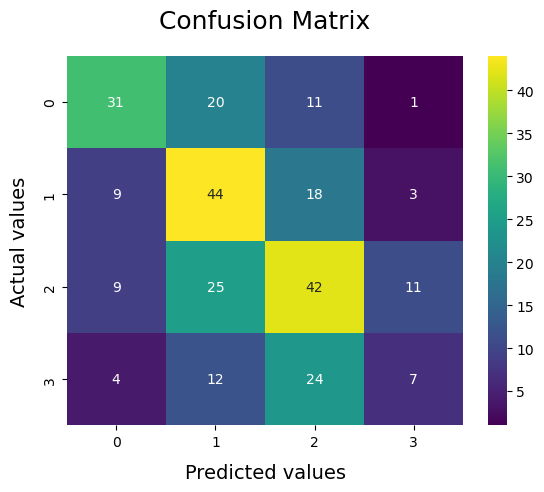

In [78]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_labels_TFIDF, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

# Visualisasi

In [79]:
models = [
          ('Naive Bayes Multinomial', accuracy_nb_train, accuracy_nb_test),                    
         ]

In [80]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Naive Bayes Multinomial,0.977848,0.457565


In [81]:
models_comparison = [
                        ('Naive Bayes Multinomial', accuracy_nb_test, recall_nb_test, precision_nb_test),                          
                    ]

In [82]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Naive Bayes Multinomial,0.457565,0.457565,0.452046


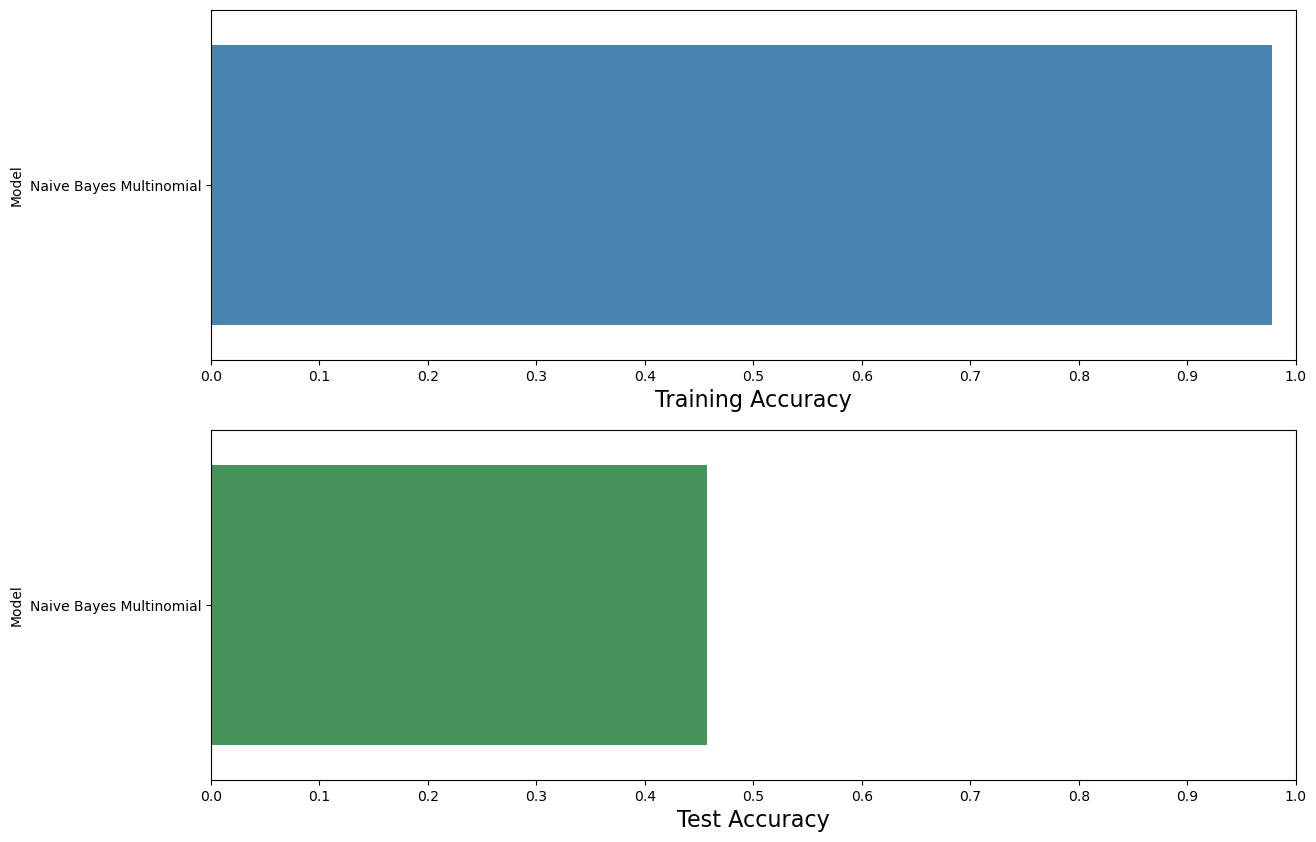

In [83]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

# Kesimpulan:

- Jelaskan dari hasil eksperimen yang dilakukan
